In [1]:

import networkx as nx
from operator import add, sub

import numpy as np
import matplotlib.pyplot as plt
from main_definitions import *
import random
import copy
import python_springrank.tools as tl
from statistics import mean
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from load_datasets import *

In [2]:
dataframe_perf_gains = pd.DataFrame(columns=["Performance gain over Postrank B0", "Method", "Dataset"])
dataframe_perf_gains

,Performance gain over Postrank B0,Method,Dataset


In [3]:
results_by_dataset = {}

reverse = False
min_iter = 20
print_rate = 100
cut_off_change = 0.1
max_iter = 1000
print_stuff = False

num_of_runs_on_dataset = 40

In [4]:
datasets = ["DBLP Citations", "Faculty Hiring (CS)"]

In [5]:
for dataset in datasets:

    DG = load_dataset(dataset)

    mapping = dict(zip(DG, range(0, DG.number_of_nodes())))
    relabelled_DG = nx.relabel_nodes(DG, mapping)


    basic_pagerank_results = []
    springrank_results = []
    postrank_results = []

    print("Running for dataset ", dataset)

    for i in range(num_of_runs_on_dataset):
        print("     iteration ", i)
        reduced_graph, removed_edges = reduce_graph(relabelled_DG, perc_edge_del=0.2)


        postrank_B0 = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0.0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        postrank_B2 = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                           page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                           backflow = True, backflow_const = 0.2,
                           min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                           cut_off_change = cut_off_change, print_stuff=False)


        perf_postrank_B0 = perc_correct(removed_edges, postrank_B0)
        perf_postrank_B2 = perc_correct(removed_edges, postrank_B2)

        perf_gain_postrank_B2 = perf_postrank_B2 - perf_postrank_B0

        postrank_B2_row = {"Performance gain over Postrank B0": perf_gain_postrank_B2, "Method": "Postrank with Backflow", "Dataset": dataset}
        dataframe_perf_gains = dataframe_perf_gains.append(postrank_B2_row, ignore_index=True)


        springrank_results.append(perf_postrank_B2)
        postrank_results.append(perf_postrank_B0)

    results_by_dataset[dataset] = {}
    results_by_dataset[dataset]["postrank"] = postrank_results
    results_by_dataset[dataset]["springrank"] = springrank_results

    print("results:")
    print("springrank:", mean(springrank_results))
    print("postrank:", mean(postrank_results))
    print("")


Running for dataset  DBLP Citations
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iteration  6
     iteration  7
     iteration  8
     iteration  9
     iteration  10
     iteration  11
     iteration  12
     iteration  13
     iteration  14
     iteration  15
     iteration  16
     iteration  17
     iteration  18
     iteration  19
     iteration  20
     iteration  21
     iteration  22
     iteration  23
     iteration  24
     iteration  25
     iteration  26
     iteration  27
     iteration  28
     iteration  29
     iteration  30
     iteration  31
     iteration  32
     iteration  33
     iteration  34
     iteration  35
     iteration  36
     iteration  37
     iteration  38
     iteration  39
results:
springrank: 0.95218935
postrank: 0.91929605

Running for dataset  Faculty Hiring (CS)
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iterat

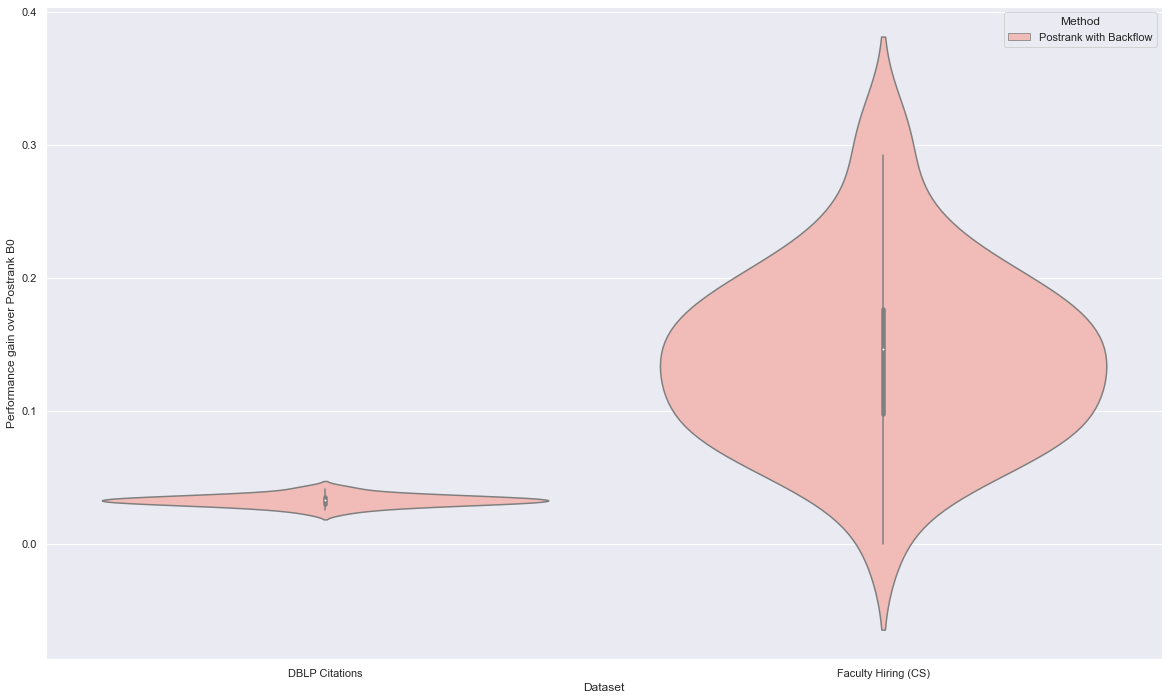

In [6]:
sns.set(rc={'figure.figsize':(20,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over Postrank B0", hue="Method", data=dataframe_perf_gains, palette="Pastel1")
plt.show()

<ipython-input-17-8c8d8d316ac7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_yticklabels(y_ticks, size = 15)


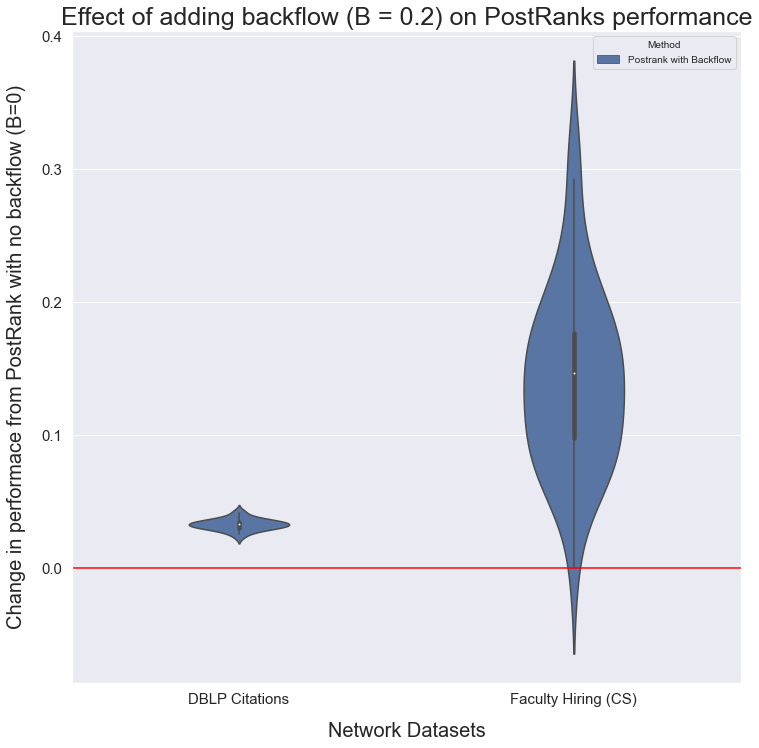

In [17]:
sns.set(rc={'figure.figsize':(12,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over Postrank B0", hue="Method", data=dataframe_perf_gains, width=0.3)

sns_plot.axes.set_title("Effect of adding backflow (B = 0.2) on PostRanks performance",fontsize=25)
sns_plot.set_xlabel("Network Datasets",fontsize=20)
sns_plot.set_ylabel("Change in performace from PostRank with no backflow (B=0)",fontsize=20)
y_ticks = sns_plot.get_yticks()
y_ticks = [-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]
sns_plot.set_yticklabels(y_ticks, size = 15)
sns_plot.set_xticklabels(datasets, size = 15)
sns_plot.xaxis.labelpad = 15
sns_plot.yaxis.labelpad = 15
sns_plot.title.labelpad = 30
plt.setp(sns_plot.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(sns_plot.get_legend().get_title(), fontsize='10')
sns_plot.axhline(y=0, color='red')

sns_plot.figure.savefig("PostRank_B0_B2.png")
plt.show()

In [13]:
sns_plot.get_yticks()




array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])